# Expansion of the homogeneous Universe (2D movie)
Florent Leclercq<br/>
Institut d'Astrophysique de Paris<br/>
12 July 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
%matplotlib widget

In [2]:
a = np.load("scale_factor_movie.npy")

In [3]:
class movie:
    def __init__(self, alist):
        self.fig = plt.figure(figsize=(4, 4), facecolor='white')
        self.ax = self.fig.add_subplot(1,1,1)

        # Set timestepping
        self.alist = alist
        self.astart = alist[0]
        self.steps = len(alist)
        
        # Set the mesh size
        size = self.size = 3
        
        # Generate lattice points
        self.x, self.y = np.array([-1,0,1,-1,0,1,-1,0,1]), np.array([-1,-1,-1,0,0,0,1,1,1])

    def show(self):
        self.fig.show()
    
    # Initialization function
    def init(self):
        a = self.astart
        ax = self.ax
        size = self.size
        
        # Scale lattice points
        x=a*self.x
        y=a*self.y
        
        # Plot lattice points
        self.plot, = ax.plot(x, y, linestyle="", color='black', marker="o")
        
        # Plot the squares
        self.line1, = ax.plot([-a,-a], [-a,a], color='black', marker="o")
        self.line2, = ax.plot([0,0], [-a,a], color='black', marker="o")
        self.line3, = ax.plot([a,a], [-a,a], color='black', marker="o")
        self.line4, = ax.plot([-a,a], [-a,-a], color='black', marker="o")
        self.line5, = ax.plot([-a,a], [0,0], color='black', marker="o")
        self.line6, = ax.plot([-a,a], [a,a], color='black', marker="o")

        # Remove axis labels
        ax.set_axis_off()
    
        # Set plot limits
        ax.set_xlim([-1.05, 1.05])
        ax.set_ylim([-1.05, 1.05])
    
        # Set aspect equal
        ax.set_aspect('equal')
    
        return self.plot, self.line1, self.line2, self.line3, self.line4, self.line5, self.line6, 
    
    # Update function
    def update(self, i):
        a = self.alist[i]
        ax = self.ax
        size = self.size
        
        # Scale lattice points
        x=a*self.x
        y=a*self.y

        # Plot lattice points
        self.plot.set_data(x,y)

        # Plot the squares
        self.line1.set_data([-a,-a], [-a,a])
        self.line2.set_data([0,0], [-a,a])
        self.line3.set_data([a,a], [-a,a])
        self.line4.set_data([-a,a], [-a,-a])
        self.line5.set_data([-a,a], [0,0])
        self.line6.set_data([-a,a], [a,a])
        
        return self.plot, self.line1, self.line2, self.line3, self.line4, self.line5, self.line6, 
        
    # Create the animation
    def animate(self):
        animation = FuncAnimation(self.fig, self.update, frames=self.steps, init_func=self.init, blit=False)
        return animation

(<matplotlib.lines.Line2D at 0x1527eb290610>,
 <matplotlib.lines.Line2D at 0x1527eb291450>)

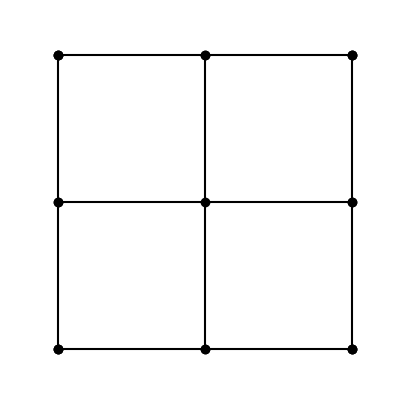

In [4]:
i=len(a)-1
frame = movie(a)
frame.init();
frame.update(i)

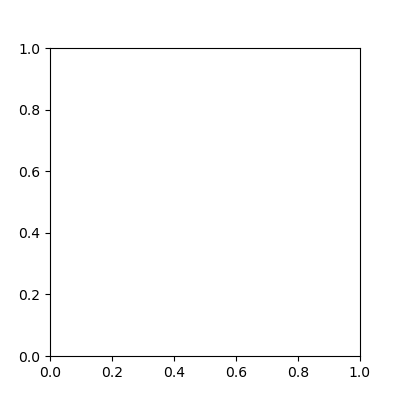

In [5]:
this_movie = movie(a)
animation = this_movie.animate()

In [6]:
animation.save("output/HomogeneousExpansion2DMovie.mp4", dpi=300, fps=48)